## 多层级测量模型
#### 二级测量模型/二级验证性因素分析，在多个一级潜变量的基础上，测量了一个更高层级的潜变量

例如下面这个例子，北京师范大学的王大华教授提出了老年人夫妻依恋包含三个维度，分别是依恋焦虑、依恋回避和依恋安全。

依恋焦虑、依恋回避和依恋安全相当于一级潜变量，它们共同描述了依恋这个概念（二级潜变量）。各一级潜变量未被解释的部分为残差E1、E2、E3、E4，其残差路径设为1，意味着依恋到一级潜变量的路径效应可以与之比较，大于残差则，路径效应大于1，反之则小于1.

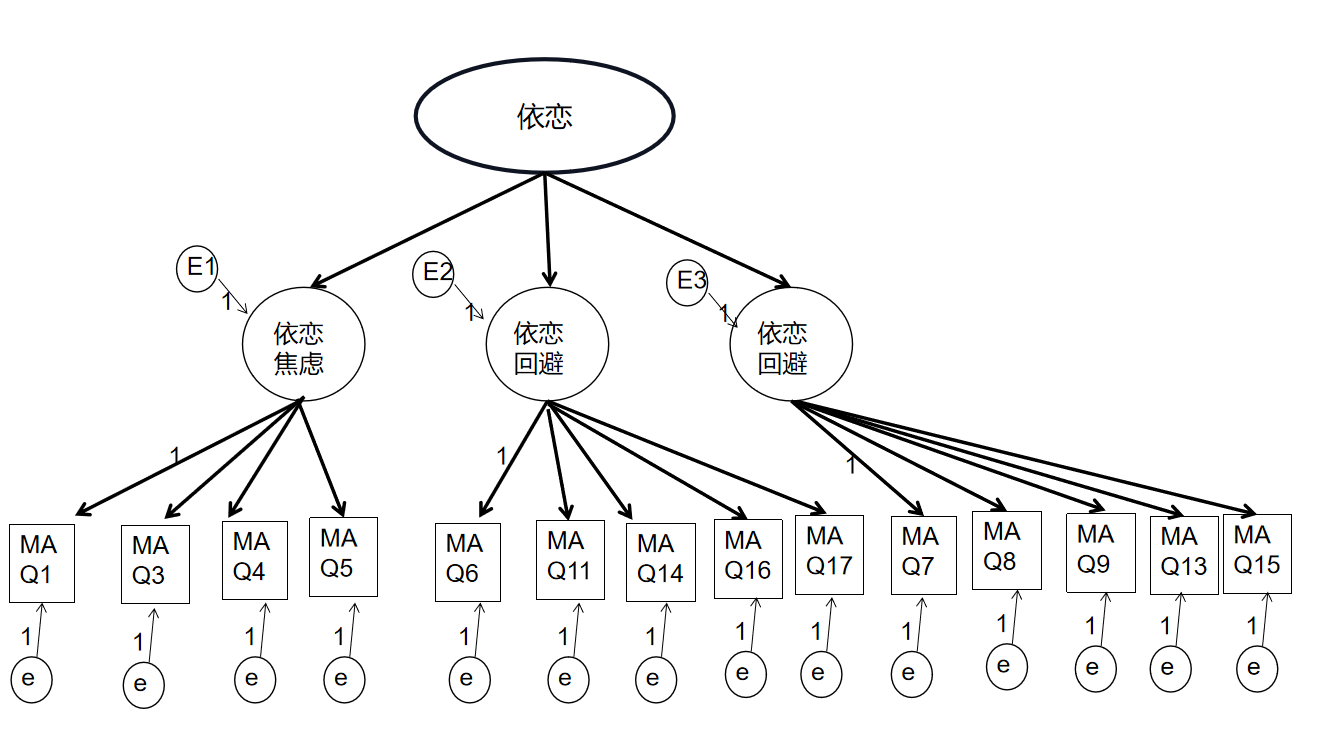

#### 在lavaan中定义上述模型

In [4]:
#载入包
library("lavaan")
#导入数据
BASE <- readxl::read_excel('C:/Users/77387/Desktop/Data_analysis_courses/R语言与结构方程模型/data/data3_12.xlsx')
head(BASE)

id,item1,item2,item3,item4,item5,item6,item7,item8,item9,...,CERQ16,CERQ17,CERQ18,word,抑郁总分,焦虑总分,SF,依恋焦虑,依恋回避,依恋安全
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
001,1,3,2,1,2,3,6,2,3,...,5,1,3,20,5,7,93.2,3.75,2.333333,3.8
002,3,3,3,3,2,1,5,1,5,...,4,1,5,20,6,2,114.4,5.25,6.833333,2.0
003,2,3,3,2,3,2,5,3,5,...,2,3,4,18,3,4,120.4,5.00,4.333333,4.4
004,2,2,3,3,1,5,6,2,4,...,2,2,3,20,3,1,127.4,2.75,1.500000,6.4
005,2,3,3,3,1,1,6,2,5,...,1,1,1,20,0,0,131.0,1.25,1.000000,6.8
006,2,3,3,3,3,2,6,2,4,...,4,2,1,19,5,6,117.4,3.75,3.833333,4.0


In [17]:
# 定义模型
model.SPE <- 'anxiety =~ MAQ1 + MAQ3 + MAQ4 + MAQ5 
                avoidance =~ MAQ6 + MAQ11 + MAQ14 + MAQ16 + MAQ17 + MAQ18 
                security =~ MAQ7 + MAQ8 + MAQ9 + MAQ13 + MAQ15 

                attachment = ~ anxiety + avoidance + security '

In [18]:
#模型拟合
model.EST <- cfa (model.SPE, data=BASE)

In [19]:
summary (model.EST,
         fit.measures = TRUE, 
         standardized = TRUE, 
         rsq = TRUE)

lhs,op,rhs,exo,est,se,z,pvalue,std.lv,std.all,std.nox
<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
anxiety,=~,MAQ1,0,1.00000000,0.00000000,NA,NA,0.4555222,0.4596010,0.4596010
anxiety,=~,MAQ3,0,2.56898047,0.42868489,5.992701,2.063838e-09,1.1702276,0.6386206,0.6386206
anxiety,=~,MAQ4,0,2.01410382,0.34018879,5.920547,3.208720e-09,0.9174690,0.6205417,0.6205417
anxiety,=~,MAQ5,0,2.28390817,0.38211181,5.977068,2.271898e-09,1.0403709,0.6345956,0.6345956
avoidance,=~,MAQ6,0,1.00000000,0.00000000,NA,NA,1.4475570,0.7738027,0.7738027
avoidance,=~,MAQ11,0,0.84165205,0.08640859,9.740375,0.000000e+00,1.2183393,0.6164797,0.6164797
avoidance,=~,MAQ14,0,0.94346150,0.08018620,11.765883,0.000000e+00,1.3657143,0.7301162,0.7301162
avoidance,=~,MAQ16,0,0.80695831,0.07182793,11.234603,0.000000e+00,1.1681181,0.7007832,0.7007832
avoidance,=~,MAQ17,0,0.99681943,0.07481706,13.323424,0.000000e+00,1.4429529,0.8162665,0.8162665


## 双因子测量模型（bifactorial model）

与两层级的结构方程模型看着相似，实际不同

双因子模型假设每一个显变量有三个来源：

1. 公因子
2. 维度因子
3. 测量误差

公因子和其他潜变量之间无相关关系（正交），如果公因子载荷高，单维度载荷低，分维度的假设将难以站住脚。

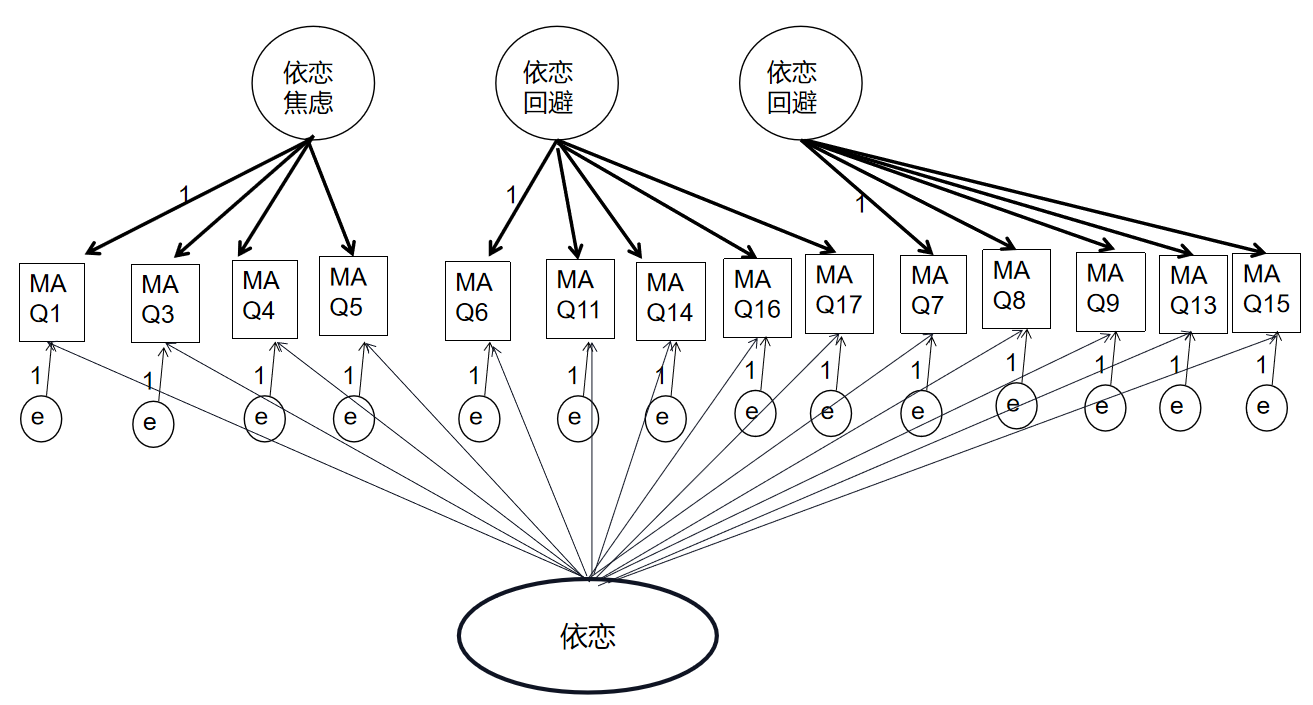

In [ ]:
# 定义模型
model.SPE <- 'anxiety =~ MAQ1 + MAQ3 + MAQ4 + MAQ5 
                avoidance =~ MAQ6 + MAQ11 + MAQ14 + MAQ16 + MAQ17 + MAQ18 
                security =~ MAQ7 + MAQ8 + MAQ9 + MAQ13 + MAQ15 

                attachment = ~MAQ1 + MAQ3 + MAQ4 + MAQ5 +  MAQ6 + MAQ11 + MAQ14 + MAQ16 + MAQ17 + MAQ18 + MAQ7 + MAQ8 + MAQ9 + MAQ13 + MAQ15
                
                anxiety ~~ 0**avoidance
                anxiety ~~ 0*security
                avoidance ~~ 0**security
                attachment ~~ 0*avoidance
                attachment ~~ 0*security
                attachment ~~ 0*anxiety
'

In [ ]:
#模型估计
model.EST <- cfa (model.SPE, sample.cov = SDQ.cov, sample.nobs = 251)

In [ ]:
#提取结果
summary (model.EST, 
         fit.measures = TRUE, 
         standardized = TRUE, 
         rsq = TRUE)